<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/Tema_1_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Preparación del entorno y de los datos

# Cargar los datos
file_path = 'customer_segmentation_data.csv'
data = pd.read_csv(file_path)

# Seleccionar características numéricas relevantes para la segmentación
selected_features = ['Age', 'Income', 'PurchaseFrequency', 'AvgPurchaseAmount',
                     'SocialMediaInteraction', 'EmailOpenRate', 'NPS']
data_selected = data[selected_features]

# Estandarizar las características para normalizar la escala de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Convertir los datos estandarizados a un DataFrame para claridad
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_segmentation_data.csv'

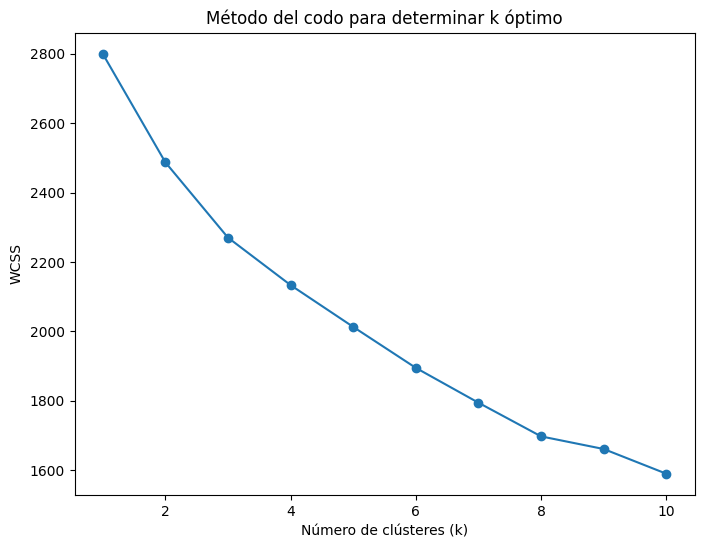

In [ ]:
# 2. Implementación del algoritmo k-means y diagrama de codo

# Calcular el WCSS para diferentes valores de k (1 a 10)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

# Graficar el diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Método del codo para determinar k óptimo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()

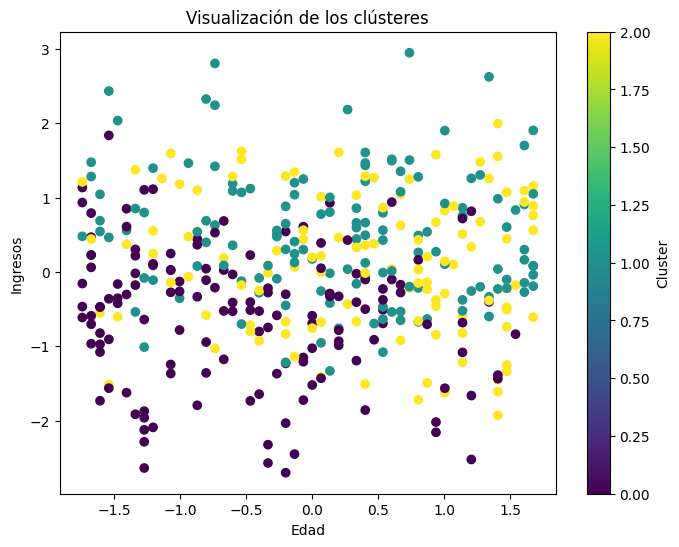

In [ ]:
# 3. Evaluación del modelo

# Basado en el gráfico, selecciona el número óptimo de clústeres (ejemplo, k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Visualización de los clústeres (usando dos dimensiones como ejemplo)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_df['Age'], data_scaled_df['Income'], c=data_scaled_df['Cluster'], cmap='viridis')
plt.title('Visualización de los clústeres')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Cluster')
plt.show()

# 4. Redacta un Informe

# Documentación del proceso:
# - Este código selecciona características relevantes, estandariza los datos, implementa K-Means, usa el método del codo para elegir k óptimo, y ajusta el modelo final.
# - La segmentación puede ser útil en marketing para identificar grupos de consumidores con comportamientos similares.